# <CENTER><div class="alert alert-block alert-info"><b>Analyse des données 'Open Food Facts' en vue de la conception d'une application au service de la santé publique <br>Exploration des données</b><div><CENTER>
    

Pour ce projet, je me suis placée dans le contexte de devoir imaginer une application en lien avec l'amimentation. La contrainte de ce projet est d'utiliser la base de données 'Open Food Facts' comme point de départ de l'application.
    
Mon idée d'application:<br> 
    L'utilisateur veut préparer un plat maison. Il s'interroge sur le nutri-score du plat. 
    Avec l'application, il peut scanner les produits qui rentrent dans la composition de son plat ainsi que les quantités.
    L'application calcule le nutriscore du plat et propose:<br>
        - des produits de remplacement pour améliorer la qualité nutritive et diminuer la présence d'additifs<br>
        - des produits fabriqués en France<br>

Les principaux objectifs de ce travail sont de réaliser une exploration du jeu de données 'Open Food Facts' ainsi que son nettoyage.

### <a name="C0">Sommaire</a>
- <a href="#C1">1. Importation des librairies nécessaires et réglage des propriétés communes des figures</a>
- <a href="#C2">2. Description du jeu de données</a>
- <a href="#C3">3. Analyse univariée</a>
    - <a href="#C31">3.1. Répartition des produits en fonction Nutri-Score</a>
    - <a href="#C32">3.2. Répartion des produits en fonction des catégories</a>
    - <a href="#C33">3.3. Quel nutriment est le plus présent?</a>
    - <a href="#C34">3.4. Les produits que nous consommons contiennent-ils beaucoup d"additifs dangereux pour notre santé?</a>
        - <a href="#C341">3.4.1. Les produits que nous achetons contiennent-ils beaucoup d"additifs?</a>
        - <a href="#C342">3.4.2. Quels est la proportion d"additifs toxiques?</a>
    - <a href="#C35">3.5. Quels est l"origine des produits vendus en France?</a>
- <a href="#C4">4. Analyse multivariée</a></div>
    - <a href="#C41">4.1. Teneur en nutriments en fonction du Nutri-Score</a>
    - <a href="#C42">4.2. Existe-il des corrélations entre les variables</a>
        - <a href="#C421">4.2.1. Matrice de corrélation</a>
        - <a href="#C412">4.1.2. Analyse en composantes principales</a>
    - <a href="#C43">4.3. Existe-t-il des catégories de produits avec de meilleurs Nutri-scores</a>

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C1">1. Importation des librairies nécessaires et réglage des propriétés communes des figures</a></div>
Pour l'analyse de ce jeu de données, nous aurons besoin des librairies : Pandas, Matplotlib, Seaborn.

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

In [2]:
# Propriétés communes des figures pour avoir un rendu harmonieux

sns.set()
#sns.set_theme(style="white", context="notebook")
sns.set_theme(style="ticks", context="notebook")
plt.rcParams['figure.dpi'] = 150
plt.rc('font', size=12)         #taille de la police de l'échelle des axes
plt.rc('axes',titlesize=18)     #taille de la police du titre
plt.rc('axes',labelsize=16)     #taille de la police du titre des axes
plt.rc('xtick', labelsize=12)   #taille de la police de l'échelle de l'axe x
plt.rc('ytick', labelsize=12)   #taille de la police de l'échelle de l'axe y
plt.rc('legend', fontsize=12) # taille de la légende
plt.rc('figure', titlesize=18) # taille du titre

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C2">2. Description du jeu de données</a></div>

In [3]:
# Lire le fichier csv et afficher les 5 premières du jeu de données
data_initial = pd.read_csv('nutrition_grade_fr.csv')
data_initial.head()

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,image_small_url,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,ii-fat_100g,estimated_energy_100g
0,106,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,...,http://fr.openfoodfacts.org/images/products/00...,12.5,70.00,57.5,2.5,2.50,0.038000,22.0,20.00000,1992.500000
1,138,39529,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1489055652,2017-03-09T10:34:12Z,Pack de 2 Twix,NaN,...,http://fr.openfoodfacts.org/images/products/00...,0.0,77.08,0.0,6.2,6.25,0.000000,NaN,4.17000,1620.500000
2,191,10207260,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1490203031,2017-03-22T17:17:11Z,1490203757,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN,...,NaN,2.9,50.30,50.3,3.9,9.50,0.001181,14.0,35.65499,2367.034634
3,226,40608754,http://world-fr.openfoodfacts.org/produit/0000...,andre,1345024108,2012-08-15T09:48:28Z,1439141731,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,...,http://fr.openfoodfacts.org/images/products/00...,0.0,10.40,10.4,0.0,0.00,0.010000,13.0,0.00000,176.800000
4,240,87177756,http://world-fr.openfoodfacts.org/produit/0000...,tacite,1433586486,2015-06-06T10:28:06Z,1433589206,2015-06-06T11:13:26Z,7Up,Boisson gazeuse aux extraits naturels de citro...,...,http://fr.openfoodfacts.org/images/products/00...,0.0,10.40,10.4,0.0,0.00,0.039370,13.0,0.00000,176.800000


In [4]:
# Connaitre la taille du jeu de données
print("Le jeu de données data se compose de", data_initial.shape[0], "lignes et de", data_initial.shape[1], "colonnes")

Le jeu de données data se compose de 51509 lignes et de 59 colonnes


In [5]:
# Connaitre le nombre de valeurs manquantes par variable
data_initial.isnull().sum()

Unnamed: 0                                     0
code                                           0
url                                            0
creator                                        0
created_t                                      0
created_datetime                               1
last_modified_t                                0
last_modified_datetime                         0
product_name                                   0
generic_name                               21193
quantity                                    7026
packaging                                   9286
packaging_tags                              9286
brands                                       230
brands_tags                                  231
categories                                  7500
categories_tags                             7500
categories_fr                               7500
manufacturing_places                       31307
manufacturing_places_tags                  31309
labels              

La colonne unnamed: 0 est la colonne des index du jeu de données original. Je souhaite supprimer cette colonne

In [6]:
data = data_initial.copy()
data.drop("Unnamed: 0", axis =1, inplace = True)
data.shape

(51509, 58)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C3">3. Analyse univariée</a></div>

In [7]:
#Pour changer les notes du Nutri-score en majuscule
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].str.upper()
data['nutrition_grade_fr'].unique()

array(['E', 'A', 'D', 'B', 'C'], dtype=object)

## <div class="alert alert-block alert-info"><a name="C31">3.1. Répartition des produits en fonction Nutri-Score</a></div>

Quelle est la qualité de notre alimentation? Dans les supermarchés francais, trouvons-nous une majorité de produits avec un bon Nutri-Score?



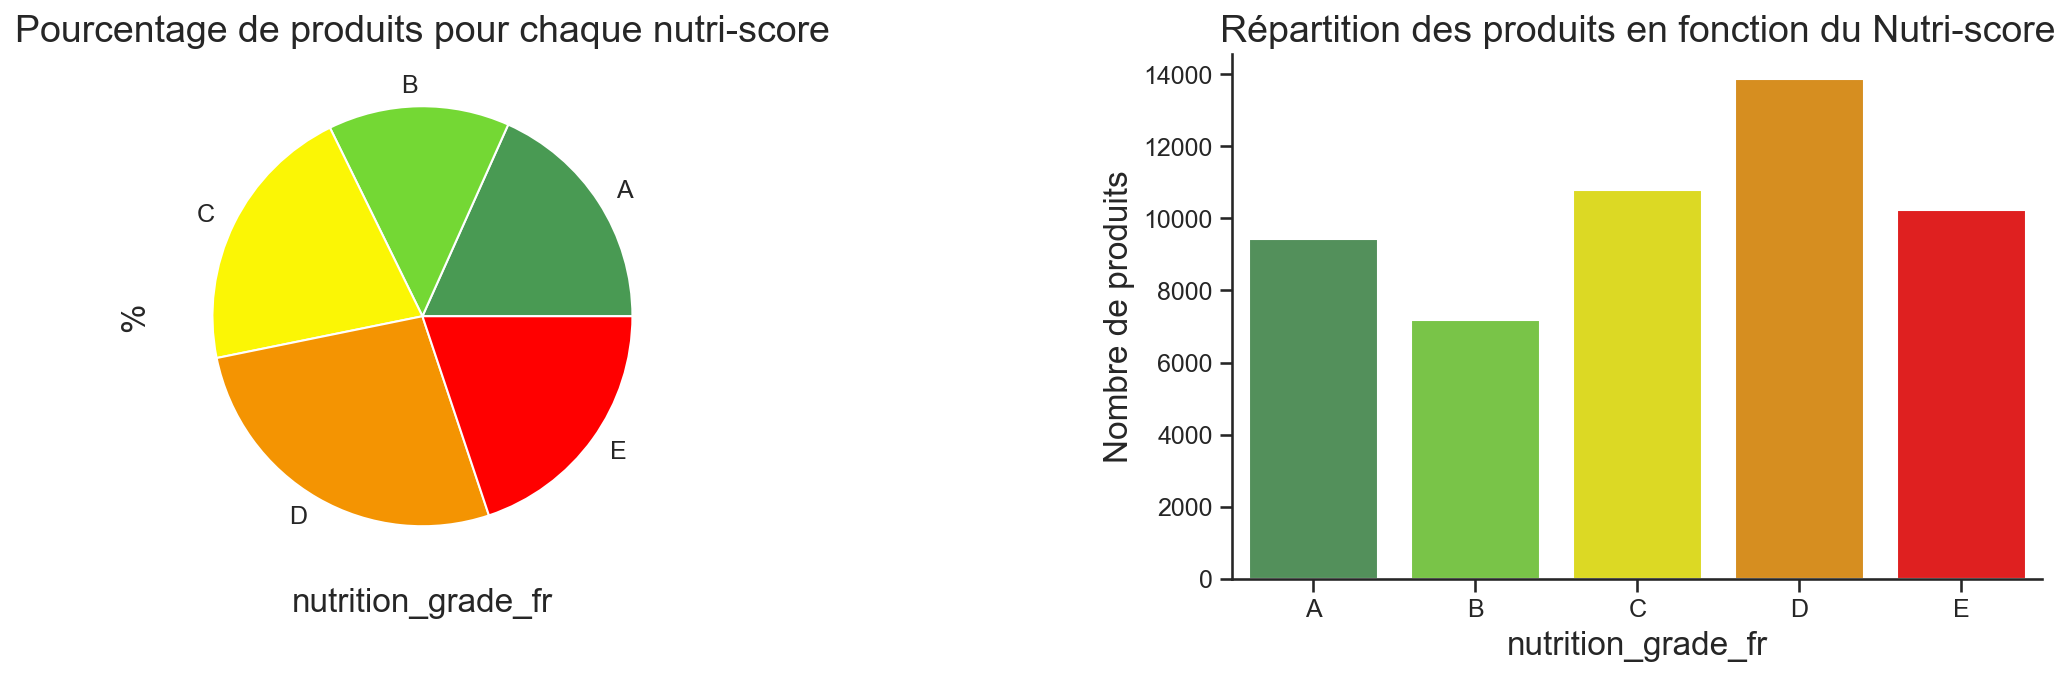

In [8]:
colors = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"]
labels = ["A", "B", "C", "D", "E"]



fig = plt.figure(figsize=(5,5))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 3, top = 1, wspace = 0.5, hspace = 15)


ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(data['nutrition_grade_fr'].value_counts(normalize=True).sort_index(), colors=colors, labels=labels)
ax1.set_title("Pourcentage de produits pour chaque nutri-score")

plt.ylabel("%")
plt.xlabel("nutrition_grade_fr")
plt.xticks(rotation=0)
#plt.style.use('ggplot')


ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.countplot(x='nutrition_grade_fr', data=data, order=labels, palette = colors )
ax2.set_ylabel("Nombre de produits")
plt.title("Répartition des produits en fonction du Nutri-score")
sns.despine()
plt.show()

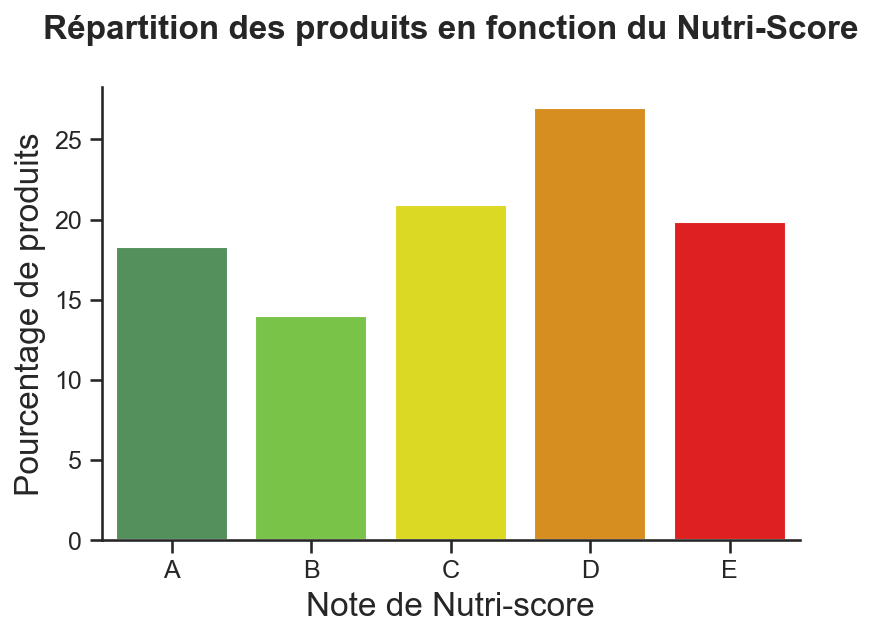

In [9]:
# Pour avoir la figure en pourcentage 
fig = plt.figure()
ax = plt.axes()

comptage_type_grade = data['nutrition_grade_fr'].value_counts()
comptage_type_grade = (comptage_type_grade*100)/comptage_type_grade.sum()
sns.barplot(x=comptage_type_grade.index, y= comptage_type_grade.values,order=labels, 
            palette = colors)

ax = ax.set(xlabel='Note de Nutri-score', ylabel='Pourcentage de produits')
plt.title("Répartition des produits en fonction du Nutri-Score""\n", fontweight='bold', fontsize=16)
sns.despine()
plt.show()

Est-ce que la répartion est la même lorsqu'on considère les boissons des aliments?

In [10]:
# Création d'un jeu de données sans valeur null pour la variables pnns_groups_1
data_plot = data.loc[data['pnns_groups_1'].notnull()]

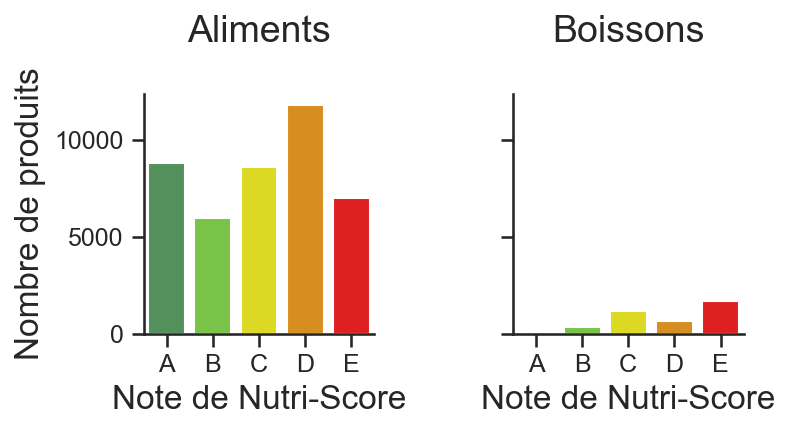

In [11]:
colors = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"]
labels = ["A", "B", "C", "D", "E"]

f, axes = plt.subplots(1, 2, figsize=(5, 2), sharey=True)

#Pour les aliments
data_aliments = data_plot[(data_plot["pnns_groups_1"]!= "Beverages")]


ax1 = sns.countplot(x='nutrition_grade_fr', data=data_aliments, order=labels, palette = colors,ax=axes[0])
axes[0].set_title("Aliments""\n")
axes[0].set_ylabel("Nombre de produits")
axes[0].set_xlabel("Note de Nutri-Score")






#Pour les boissons
data_boissons = data_plot[(data_plot["pnns_groups_1"]== "Beverages")]

sns.countplot(x='nutrition_grade_fr', data=data_boissons, order=labels, palette = colors,ax=axes[1])
axes[1].set_title("Boissons""\n")
axes[1].set_xlabel("Note de Nutri-Score")
axes[1].set_ylabel(" ")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)
sns.despine()
plt.show()

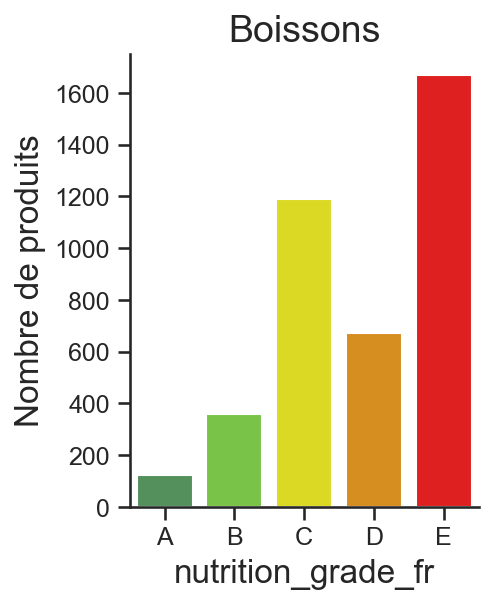

In [12]:
# Pour avoir la figure concernant les boissons à une autre échelle
fig = plt.figure(figsize = (3,4))
ax = plt.axes()

ax = sns.countplot(x='nutrition_grade_fr', data=data_boissons, order=labels, palette = colors )
ax.set_ylabel("Nombre de produits")
plt.title("Boissons")
sns.despine()
plt.show()

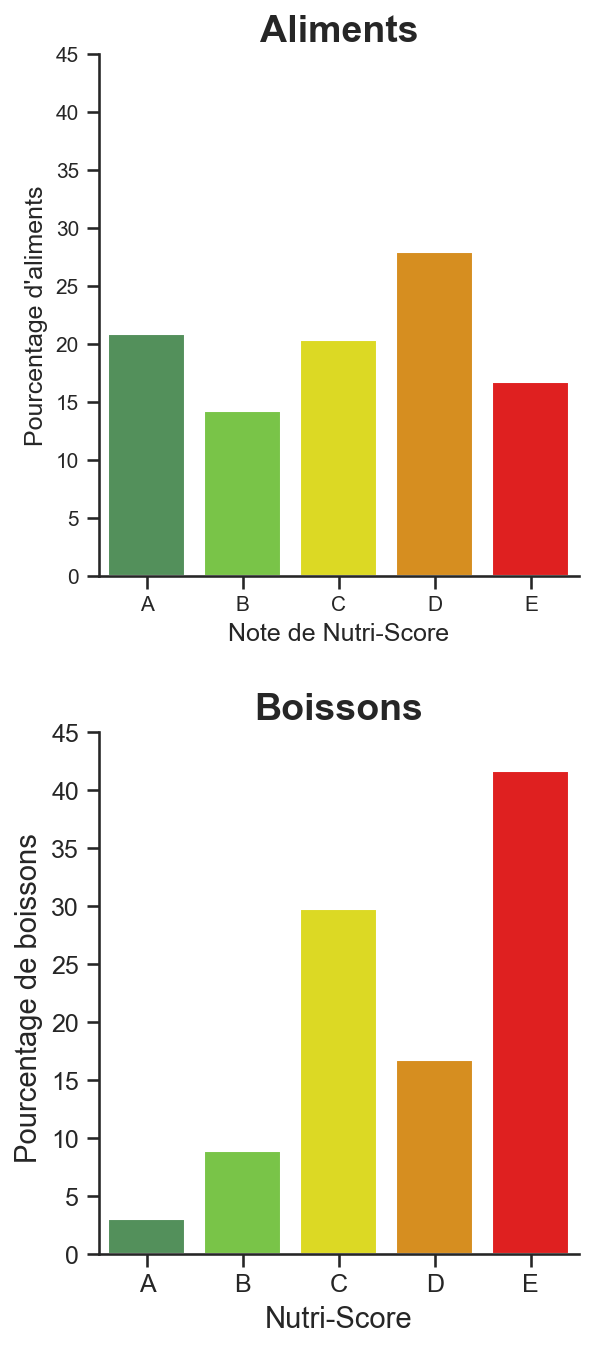

In [13]:
# Pour avoir les figures en pourcentage
colors = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"]
labels = ["A", "B", "C", "D", "E"]

f, axes = plt.subplots(2, 1, figsize=(4, 10))

#Pour les aliments
data_aliments = data_plot[(data_plot["pnns_groups_1"]!= "Beverages")]
comptage_type_grade = data_aliments['nutrition_grade_fr'].value_counts()
comptage_type_grade = (comptage_type_grade*100)/comptage_type_grade.sum()

axes[0] = sns.barplot(x=comptage_type_grade.index, y= comptage_type_grade.values,order=labels, 
            palette = colors,ax=axes[0])
axes[0].set_title("Aliments",fontweight='bold')
axes[0].set_ylabel("Pourcentage d'aliments",fontsize=12)
axes[0].set_xlabel("Note de Nutri-Score",fontsize=12)
axes[0].xaxis.set_tick_params(labelsize=10)
axes[0].yaxis.set_tick_params(labelsize=10)
axes[0].set_ylim(0,45)

#Pour les boissons
data_boissons = data_plot[(data_plot["pnns_groups_1"]== "Beverages")]
comptage_type_grade = data_boissons['nutrition_grade_fr'].value_counts()
comptage_type_grade = (comptage_type_grade*100)/comptage_type_grade.sum()

axes[1] = sns.barplot(x=comptage_type_grade.index, y= comptage_type_grade.values,order=labels, 
            palette = colors,ax=axes[1])


axes[1].set_title("Boissons",fontweight='bold')
axes[1].set_xlabel("Nutri-Score", fontsize=14)
axes[1].set_ylabel("Pourcentage de boissons ",fontsize=14)
axes[1].xaxis.set_tick_params(labelsize=12)
axes[1].yaxis.set_tick_params(labelsize=12)
axes[1].set_ylim(0,45)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
sns.despine()
plt.show()

On retrouve un peu tout les scores pour les aliments. En revanche, la majorité des boissons contenues dans le jeu de données ont de mauvais Nutri-Score.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C32">3.2. Répartion des produits en fonction des catégories</a></div>

Quelles sont les différentes catégories de produits?


In [14]:
data["pnns_groups_1"].unique()

array(['unknown', nan, 'Beverages', 'Sugary snacks',
       'Fruits and vegetables', 'Composite foods',
       'Milk and dairy products', 'Fat and sauces', 'Salty snacks',
       'Cereals and potatoes', 'Fish Meat Eggs'], dtype=object)

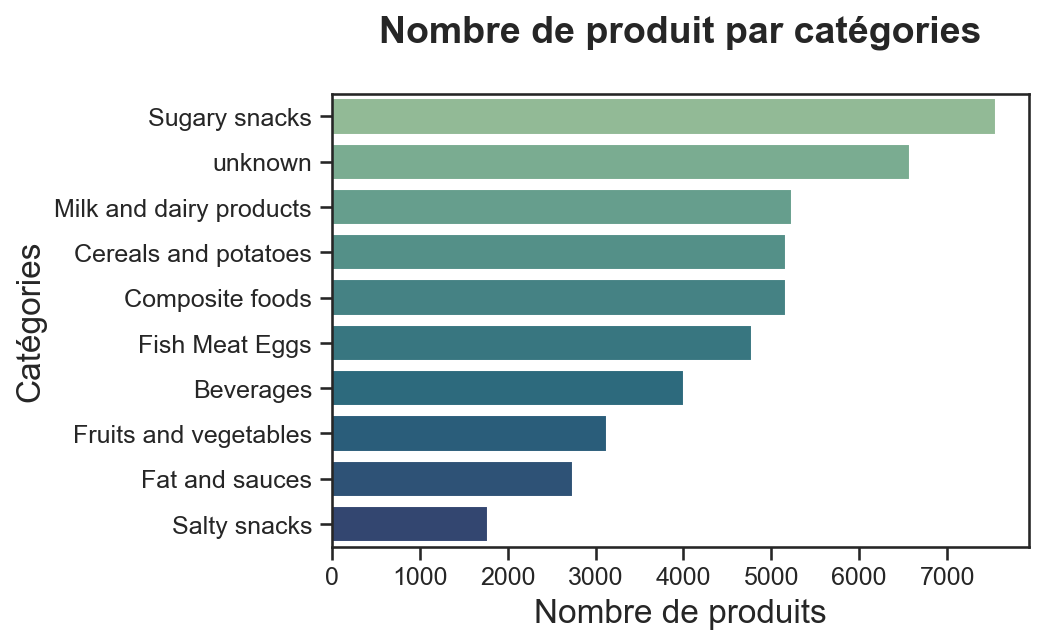

In [15]:
# figure pour visualiser la répartion des produits dans les différentes catégories
fig = plt.figure()
ax = plt.axes()
y = data["pnns_groups_1"].value_counts(normalize=False)
sns.barplot(x=y,y=y.index, palette="crest")
ax = ax.set(xlabel='Nombre de produits', ylabel='Catégories')
plt.title("Nombre de produit par catégories""\n", fontweight='bold')
plt.show()

Il y a beaucoup de produits dans la catégorie unknow.
Quel est la proportion de produits dans la catégorie unknow ou avec le champ pnns_groups_1 non renseignées?

In [16]:
produits_sans_categories = data.loc[(data["pnns_groups_1"]=="unknown")|data["pnns_groups_1"].isnull()]
proportion_produits_sans_categories = produits_sans_categories.shape[0]*100/data.shape[0]
print("La proportion de produits dans catégories est de ", proportion_produits_sans_categories,"%")


La proportion de produits dans catégories est de  23.209536197557707 %


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C33">3.3. Quel nutriment est le plus présent?</a></div>



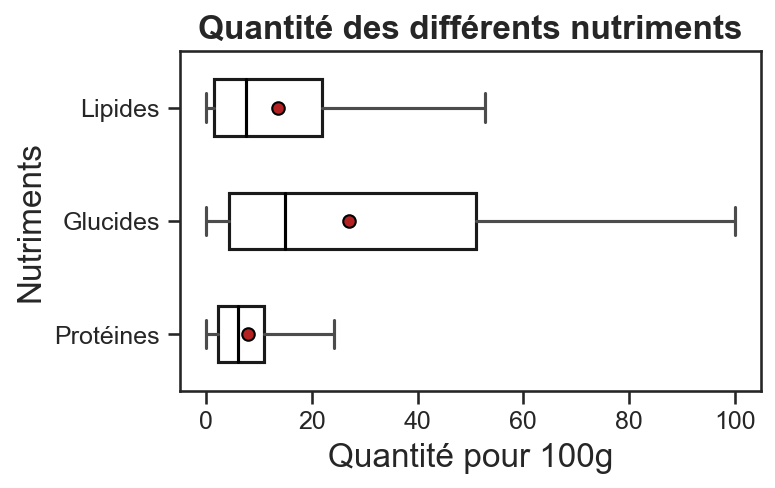

In [17]:
nutriments = ['ii-fat_100g', 'carbohydrates_100g','proteins_100g']
data_nutriments = data[nutriments]

data_nutriments.columns= ['Lipides', 'Glucides','Protéines']

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
    
# Propriétés graphiques  
labels = ['Lipides', 'Glucides','Protéines']
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
boxprops = {'edgecolor':'k', 'linewidth':1.5, 'facecolor': 'w'}
ax.set_title("Quantité des différents nutriments",fontweight='bold', fontsize =16)   
ax = sns.boxplot(data = data_nutriments, orient="h",showfliers=False, 
                 medianprops=medianprops,  showmeans=True, meanprops=meanprops, 
                 boxprops=boxprops, width=0.5)
ax.set(xlabel="Quantité pour 100g", ylabel='Nutriments')
plt.show()

Le nutriment majoritaire des produits du jeu de données sont les glucides.

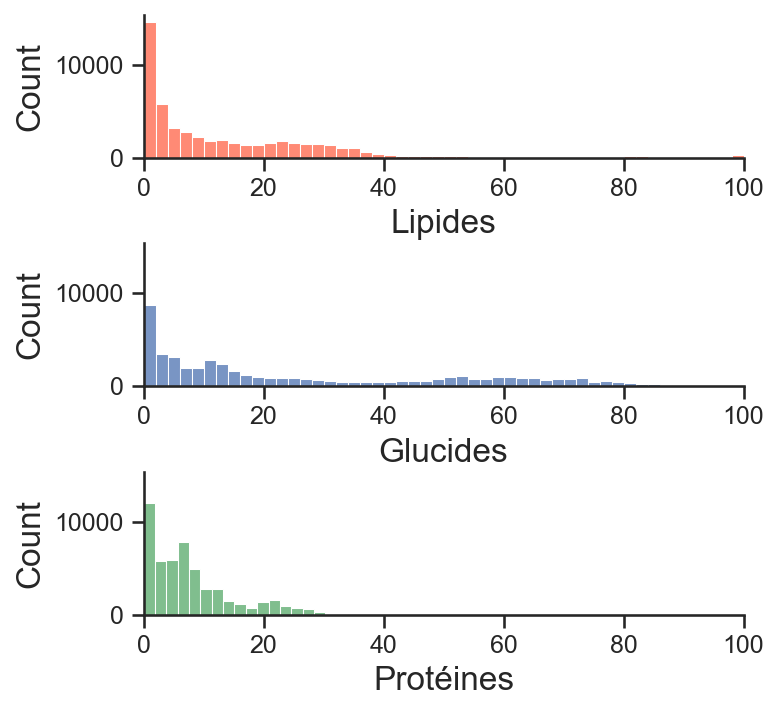

In [18]:
# Autres représentation,

f, axes = plt.subplots(3, 1, figsize=(5, 5), sharey=True)

sns.histplot(data=data_nutriments, x='Lipides', kde=False, color="tomato", ax=axes[0], bins=50)
sns.histplot(data=data_nutriments, x='Glucides', kde=False, color="b", ax=axes[1],bins=50)
sns.histplot(data=data_nutriments, x='Protéines', kde=False, color="g", ax=axes[2],bins=50)

plt.setp(axes, xlim=[0,100])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
sns.despine()
plt.show()

Les boîtes à moustaches me semblent plus pertinentes pour connaitre quel est le nutriment le plus présent dans notre alimentation

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C34">3.4. Les produits que nous consommons contiennent-ils beaucoup d'additifs dangereux pour notre santé?</a></div>

L'idée de l'application repose également sur la proposition de produits incluant moins d'additifs ou des additifs moins dangereux.

Le jeu de données contient les variables
- "additives_n": nombre d'additifs alimentaires
- "additives": pour chaque produit donne une liste de composant (qui ne correspond pas forcément à un additif)
- "additives_tags": pour chaque produit, donne le ou les codes des additifs présents dans le produit

Les produits que nous achetons contiennent-ils beaucoup d'additifs?
Ces additifs sont-ils dangereux pour notre santé?

### <div class="alert alert-block alert-info"><a name="C341">3.4.1. Les produits que nous achetons contiennent-ils beaucoup d'additifs?</a></div>


In [19]:
print("L'information concernant le nombre d'addififs est manquante pour", data["additives_n"].isnull().sum(), "produits.")
print("soit", data["additives_n"].isnull().sum()*100/data.shape[0],"%")

L'information concernant le nombre d'addififs est manquante pour 9978 produits.
soit 19.371371993243898 %


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 13, 15, 16,
            17, 18, 20, 21, 19, 31],
           dtype='int64')


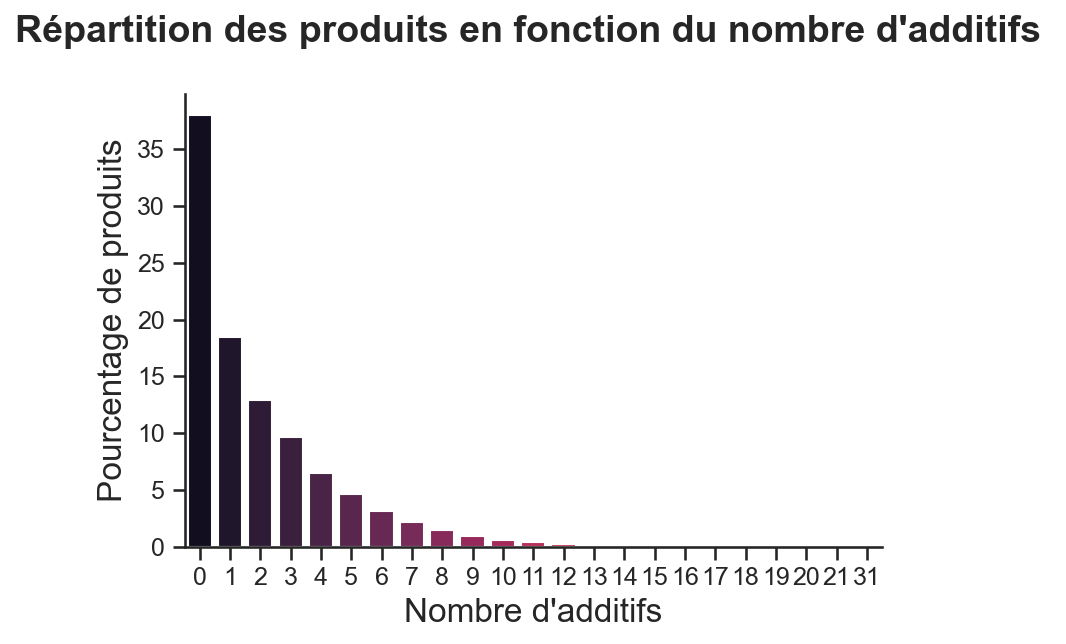

In [20]:

fig = plt.figure()
ax = plt.axes()

comptage_nb_add = data["additives_n"].value_counts()
comptage_nb_add = (comptage_nb_add*100)/comptage_nb_add.sum()
x = comptage_nb_add.index.astype('int32')
sns.barplot(x=x, y= comptage_nb_add.values, palette = 'rocket')

print(comptage_nb_add.index.astype('int32'))


ax = ax.set(xlabel="Nombre d'additifs", ylabel='Pourcentage de produits')
plt.title("Répartition des produits en fonction du nombre d'additifs ""\n", fontweight='bold')
#plt.xticks[]
sns.despine()
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C342">3.4.2. Quels est la proportion d'additifs toxiques?</a></div>


In [21]:
data_add = data.copy()

In [22]:
print("L'information concernant l'identité des addififs est manquante pour", data_add["additives_tags"].isnull().sum(), "produits.")
print("soit", data_add["additives_tags"].isnull().sum()*100/data.shape[0],"%")

L'information concernant l'identité des addififs est manquante pour 25745 produits.
soit 49.981556621173 %


In [23]:
# Creation d'un dataframe contenant les différents additifs présents
data_add_frequency = data_add["additives_tags"].str.split(pat=',',expand=True).stack().value_counts().reset_index()
data_add_frequency.rename(columns = {'index':'code',0:'frequence'},inplace=True)
data_add_frequency.head()

,code,frequence
0,en:e330,6747
1,en:e322,5326
2,en:e300,4017
3,en:e500,3387
4,en:e250,3235


In [24]:
# Pour enlever 'en:' de chaque code d'additifs
data_add_frequency['code'] = data_add_frequency['code'].str.split(':').str[-1]
data_add_frequency

,code,frequence
0,e330,6747
1,e322,5326
2,e300,4017
3,e500,3387
4,e250,3235
...,...,...
313,e450iv,1
314,e350ii,1
315,e160aiii,1
316,e340iii,1


A présent, je souhaite déterminer si les additifs répertoriés sont dangereux ou non pour la santé. Pour cela, je vais:
- charger un fichier csv contenant les codes des additifs ainsi que leur toxicité
- assembler les deux jeux de données pour pouvoir faire une représentation graphique

In [25]:
data_toxicity = pd.read_csv("additives.csv", sep=';')
data_toxicity.head()

,additive_codes,toxicity
0,e100,Ne pas abuser
1,e101,Ne pas abuser
2,e102,Très toxique
3,e104,Très toxique
4,e105,Très toxique


In [26]:
result_df = pd.merge(data_add_frequency, data_toxicity, how='inner',left_on = "code", right_on="additive_codes")

In [27]:
result_df

,code,frequence,additive_codes,toxicity
0,e330,6747,e330,Ne pas abuser
1,e322,5326,e322,Ne pas abuser
2,e300,4017,e300,Pas/peu toxique
3,e500,3387,e500,Pas/peu toxique
4,e250,3235,e250,Très toxique
...,...,...,...,...
258,e914,1,e914,Douteux
259,e513,1,e513,Ne pas abuser
260,e173,1,e173,Toxique
261,e1518,1,e1518,Pas/peu toxique


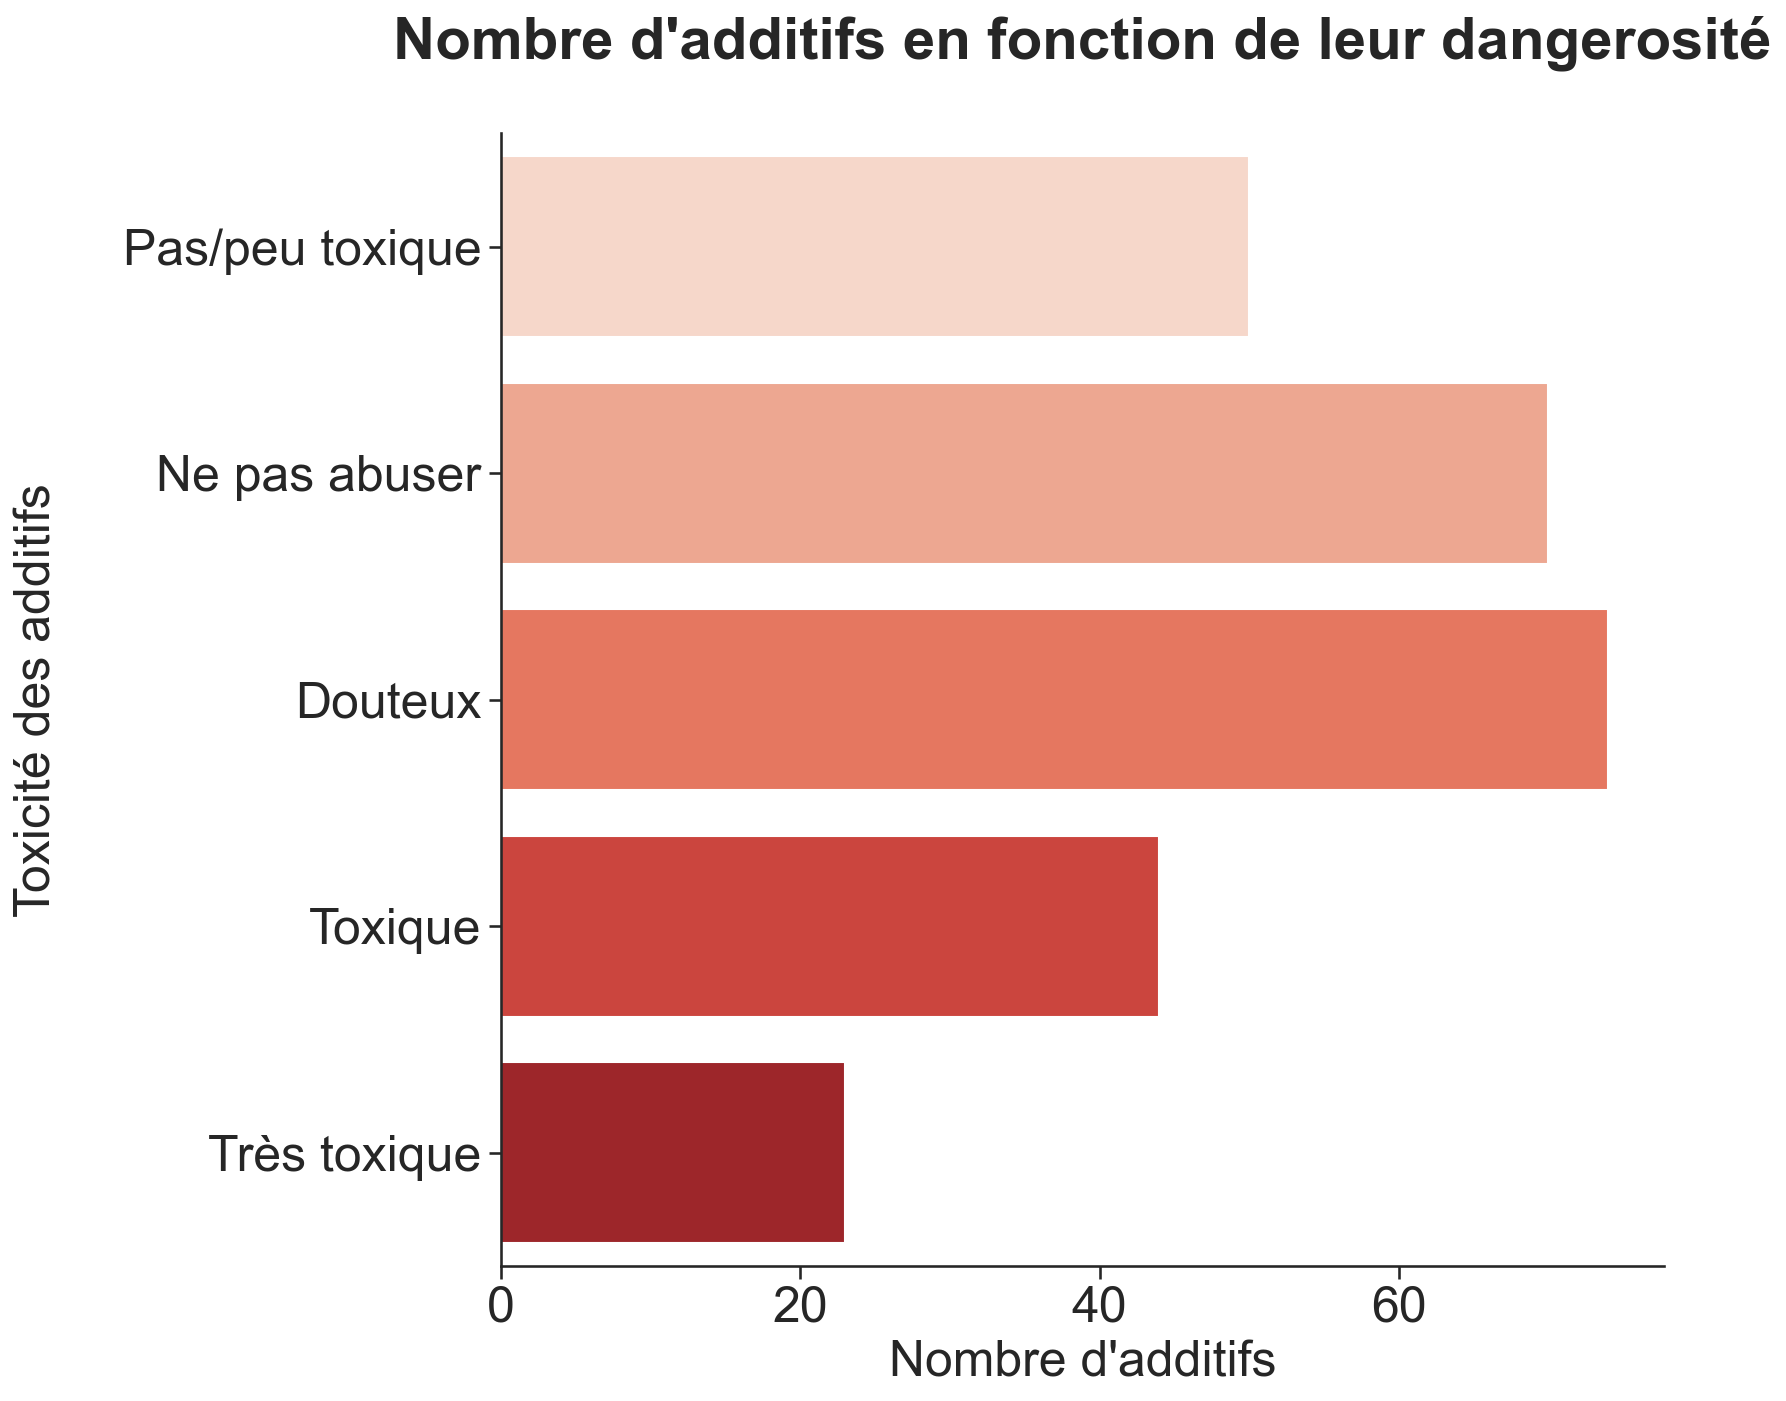

In [28]:
# Réprésenté le nombre d'additifs en fonction de leur dangerosité

order_toxicity = ["Pas/peu toxique", "Ne pas abuser", "Douteux", "Toxique","Très toxique"]

fig = plt.figure(figsize=(10,10))
ax1 = ax = plt.axes()
ax1 = sns.countplot(y="toxicity", data=result_df, order=order_toxicity, palette = 'Reds')
ax1.set_xlabel("Nombre d'additifs", fontsize = 24)
ax1.set_ylabel("Toxicité des additifs""\n", fontsize = 24)
plt.title("Nombre d'additifs en fonction de leur dangerosité""\n", fontsize= 28, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)

sns.despine()
plt.show()

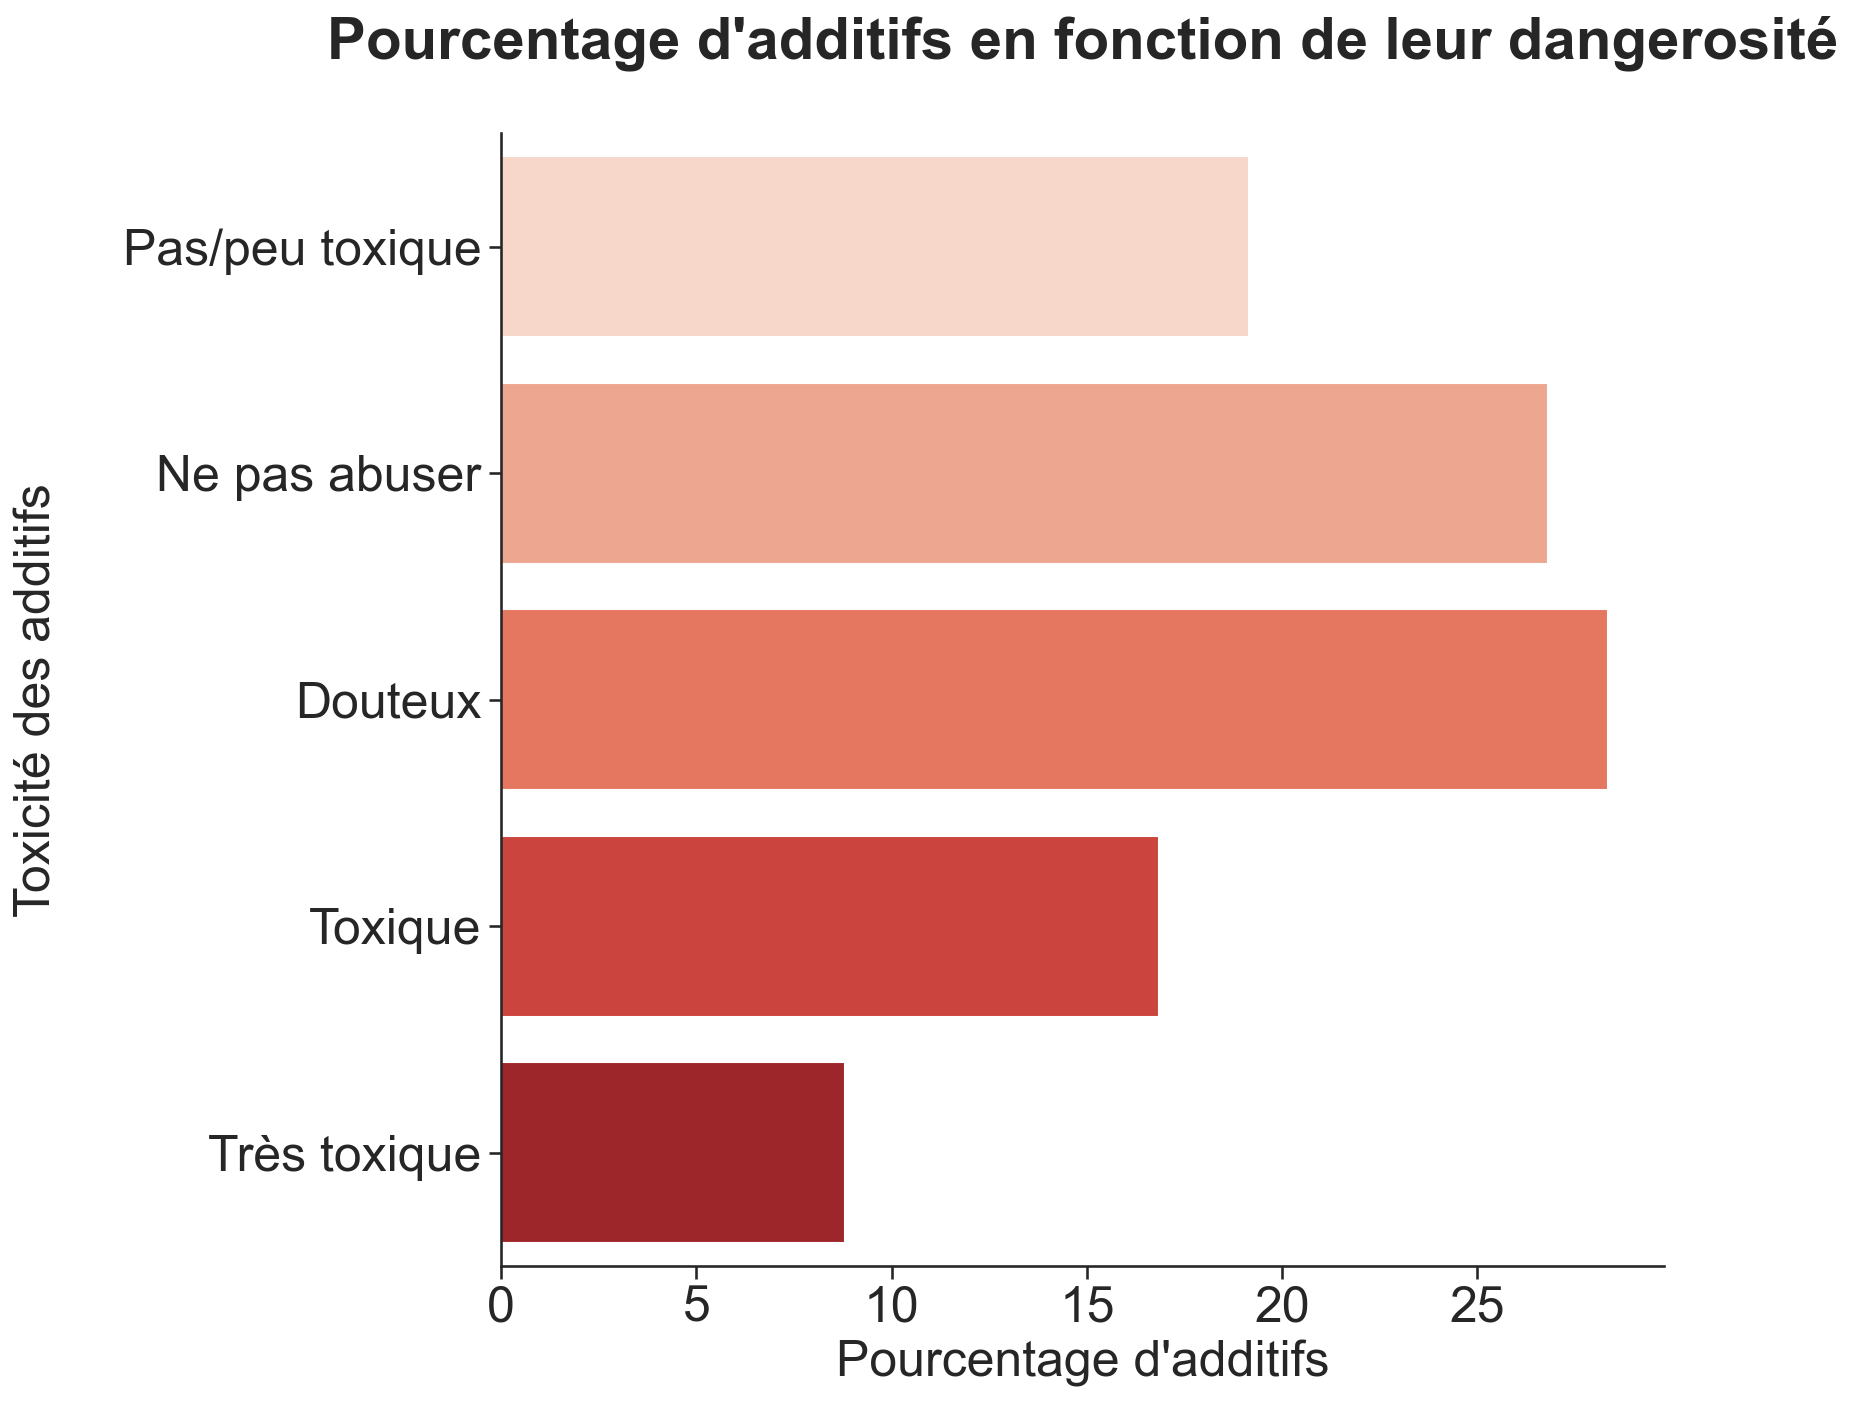

In [29]:
# Pour avoir la figure en pourcentage 
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

order_toxicity = ["Pas/peu toxique", "Ne pas abuser", "Douteux", "Toxique","Très toxique"]
comptage_additif = result_df['toxicity'].value_counts()
comptage_additif= (comptage_additif*100)/comptage_additif.sum()
sns.barplot(y=comptage_additif.index, x= comptage_additif.values,order=order_toxicity, 
            palette = 'Reds')

ax.set_xlabel("Pourcentage d'additifs", fontsize = 24)
ax.set_ylabel("Toxicité des additifs""\n", fontsize = 24)
plt.title("Pourcentage d'additifs en fonction de leur dangerosité""\n", fontweight='bold', fontsize=28)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)

sns.despine()
plt.show()

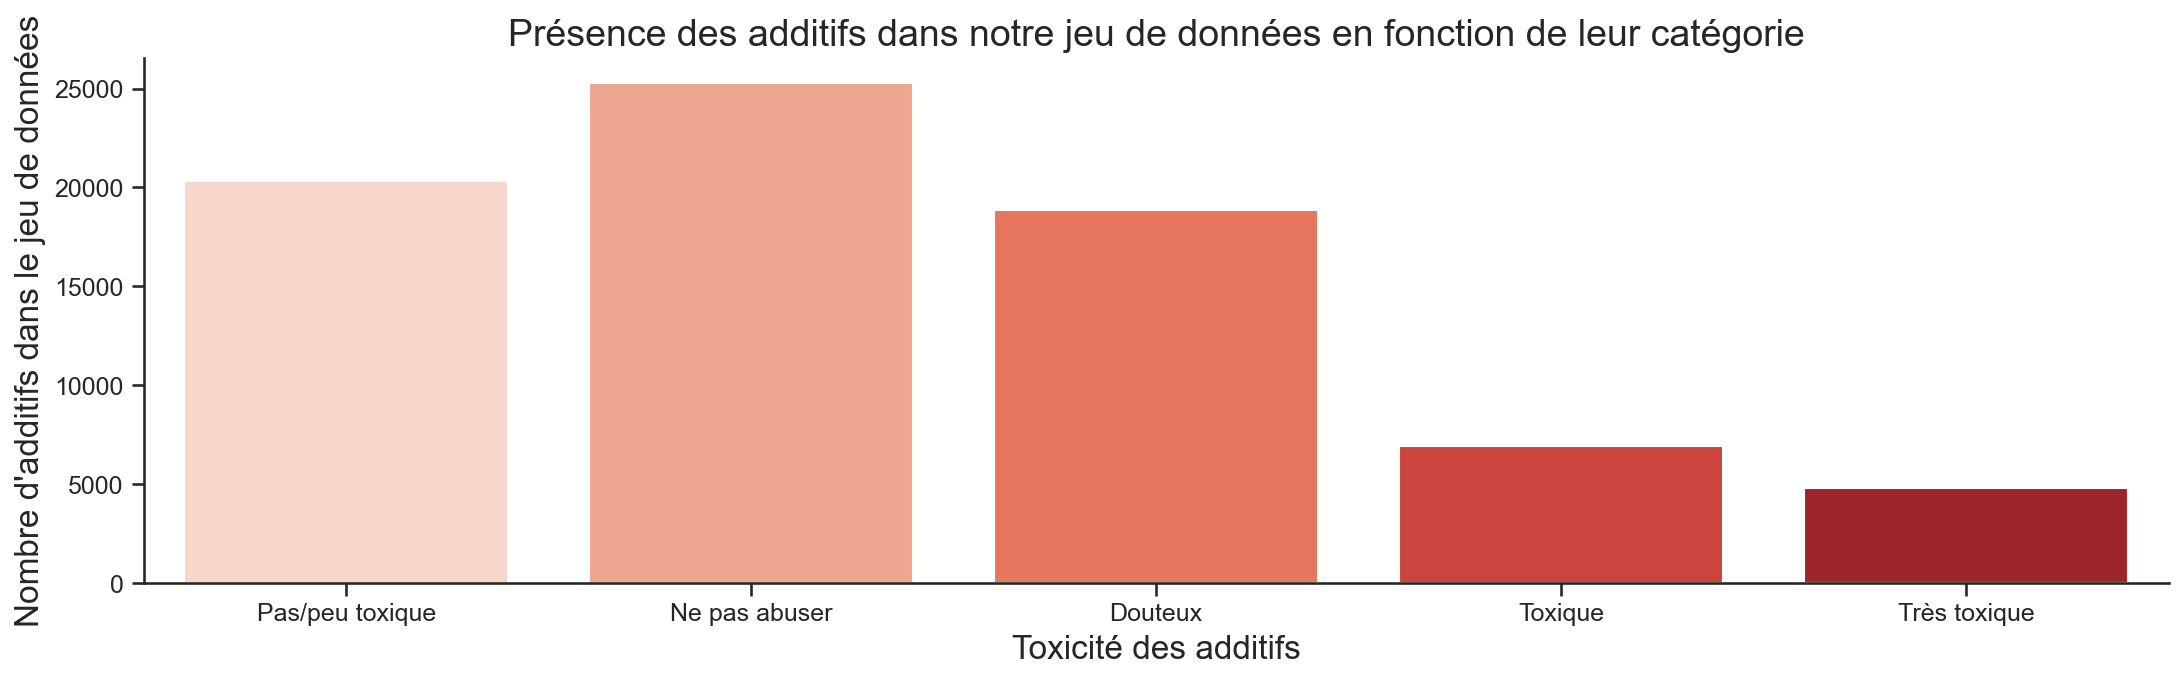

In [30]:
# Représentation de la fréquence des addiditifs
freq = result_df.groupby(['toxicity'])['frequence'].sum()

order_toxicity = ["Pas/peu toxique", "Ne pas abuser", "Douteux", "Toxique","Très toxique"]
fig = plt.figure(figsize=(5,5))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 3, top = 1, wspace = 0.5, hspace = 15)

ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.barplot(x= freq.index,y=freq, order=order_toxicity, palette = 'Reds')
ax1.set_ylabel("Nombre d'additifs dans le jeu de données")
ax1.set_xlabel("Toxicité des additifs")
plt.title("Présence des additifs dans notre jeu de données en fonction de leur catégorie")

sns.despine()
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C35">3.5. Quels est l'origine des produits vendus en France?</a></div>

Avec la variable "manufacturing_places", il est possible de connaître l'endroit où le produit est transformé. Cela ne reflète cependant pas l'origine des ingrédients.


In [31]:
data_origine = data.copy()
print("L'information concernant l'endroit où les produits sont transformée est manquante pour", data_origine['manufacturing_places'].isnull().sum(), "produits.")
print("soit", data_origine['manufacturing_places'].isnull().sum()*100/data_origine.shape[0],"%")

L'information concernant l'endroit où les produits sont transformée est manquante pour 31307 produits.
soit 60.77966957230775 %


Cette variable n'est renseignée que pour 40% des produits.<br>
A quoi ressemble-t-elle? Quels sont les pays les plus représentés?

In [32]:
data_origine[['code','manufacturing_places']].loc[data_origine['manufacturing_places'].notnull()]

,code,manufacturing_places
6,30,France
7,31,"France,Limousin,87500,Saint-Yrieux"
8,50,"France,87500"
9,51,"87500,France"
10,104,France
...,...,...
51496,9556156040182,Malaisie
51497,9556156046399,Singapour
51498,9556417639339,Malaisie
51500,9556587103869,Malaisie


In [33]:
data_origine[['code','manufacturing_places']].loc[data_origine['manufacturing_places'].str.contains('france')==True]

,code,manufacturing_places
1059,2000000027872,"Domagné,Bretagne,france"
1068,2000000029892,france
1092,2000000032563,france
1182,2000000042736,"france,italie"
2395,20459079,"france,Normandie"
...,...,...
42089,4010198016413,"villetaneuse, france"
42884,5000159472005,france
45035,5411788042338,france
45935,637730,france


Le format de la variables 'manufacturing_places' n'est pas toujours le même: présence de majuscule, de précision géographique.
Pour les produits manufacturés en France, je vais harmoniser cette variable pour qu'il n'y ai que le mot 'france' qui soit présent.

In [34]:
# Mettre tout en minuscule
data_origine['manufacturing_places'] = data_origine['manufacturing_places'].str.lower()

# Remplacer par 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('france')==True,'manufacturing_places'] = 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('belgique')==True,'manufacturing_places'] = 'belgique'
data_origine.loc[data_origine['manufacturing_places'].str.contains('allemagne')==True,'manufacturing_places'] = 'allemagne'
data_origine.loc[data_origine['manufacturing_places'].str.contains('ile de noirmoutier')==True,'manufacturing_places'] = 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('dijon')==True,'manufacturing_places'] = 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('landes')==True,'manufacturing_places'] = 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('annecy')==True,'manufacturing_places'] = 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('bretagne')==True,'manufacturing_places'] = 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('perpignan')==True,'manufacturing_places'] = 'france'
data_origine.loc[data_origine['manufacturing_places'].str.contains('pays bas')==True,'manufacturing_places'] = 'pays-bas'
data_origine.loc[data_origine['manufacturing_places'].str.contains('pays-bas')==True,'manufacturing_places'] = 'pays-bas'
data_origine.loc[data_origine['manufacturing_places'].str.contains('italie')==True,'manufacturing_places'] = 'italie'
data_origine.loc[data_origine['manufacturing_places'].str.contains('italia')==True,'manufacturing_places'] = 'italie'
data_origine.loc[data_origine['manufacturing_places'].str.contains('espagne')==True,'manufacturing_places'] = 'espagne'
data_origine.loc[data_origine['manufacturing_places'].str.contains('royaume')==True,'manufacturing_places'] = 'royaume-uni'
data_origine.loc[data_origine['manufacturing_places'].str.contains('suisse')==True,'manufacturing_places'] = 'Suisse'
data_origine.loc[data_origine['manufacturing_places'].str.contains('portugal')==True,'manufacturing_places'] = 'portugal'
data_origine.loc[data_origine['manufacturing_places'].str.contains('españa')==True,'manufacturing_places'] = 'espagne'


data_origine['manufacturing_places'] = data_origine['manufacturing_places'].str.capitalize()
data_origine[['code','manufacturing_places']].loc[data_origine['manufacturing_places'].notnull()]

,code,manufacturing_places
6,30,France
7,31,France
8,50,France
9,51,France
10,104,France
...,...,...
51496,9556156040182,Malaisie
51497,9556156046399,Singapour
51498,9556417639339,Malaisie
51500,9556587103869,Malaisie


In [35]:
comptage = (data_origine['manufacturing_places'].value_counts()* 100 /
            data_origine['manufacturing_places'].value_counts().sum())
comptage

France                                                                                   70.799921
Italie                                                                                    6.435006
Allemagne                                                                                 3.455103
Belgique                                                                                  3.247203
Espagne                                                                                   2.390852
                                                                                           ...    
Londres                                                                                   0.004950
Briouze                                                                                   0.004950
2 bvd de l'industrie                                                                      0.004950
Drôme provençale                                                                          0.004950
Кондитерск

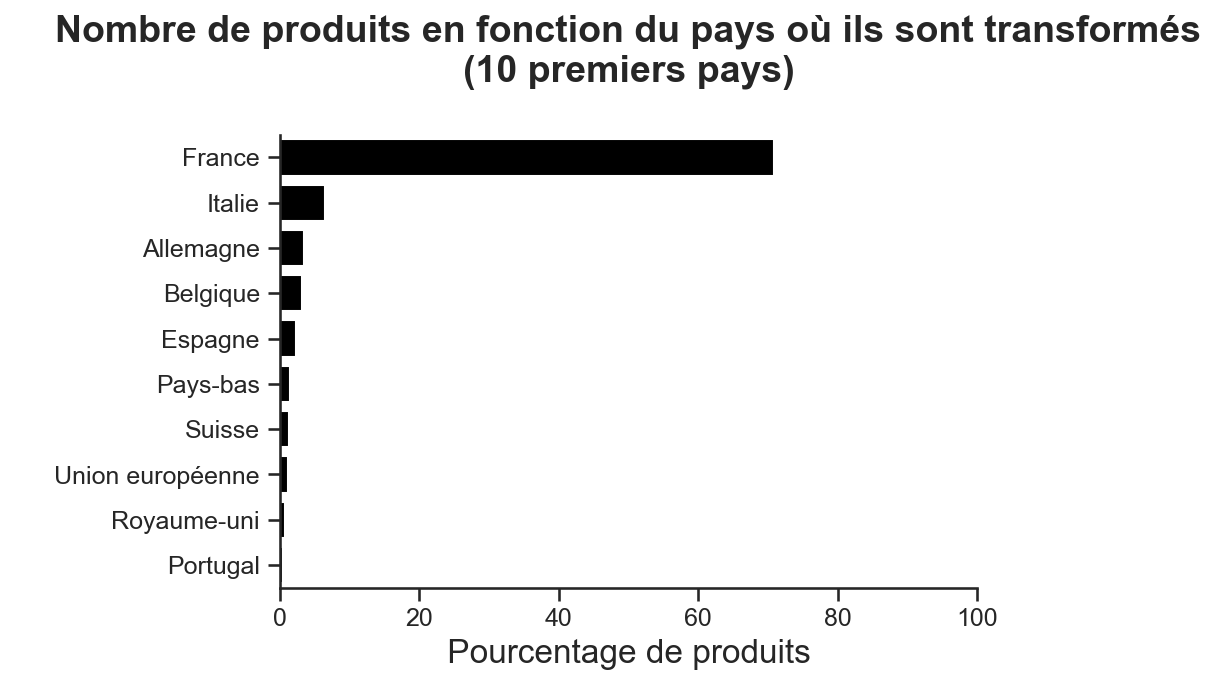

In [36]:
# Représentation graphique du lieu où sont transformés les produits
fig = plt.figure()
ax = plt.axes()

comptage = (data_origine['manufacturing_places'].value_counts()* 100 /
            data_origine['manufacturing_places'].value_counts().sum())

ax = sns.barplot(y=comptage[:10].index, x= comptage[:10].values, color = 'black')
ax.set(xlabel=" Pourcentage de produits ", ylabel=' ')
plt.title("Nombre de produits en fonction du pays où ils sont transformés" "\n""(10 premiers pays)""\n", fontweight='bold')
ax.set_xlim(0,100)
sns.despine()
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C4">4. Analyse multivariée</a></div>


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C41">4.1. Teneur en nutriments en fonction du Nutri-Score</a></div>

Est-ce que les quantités des différents nutriments sont différentes en fonction du Nutri-Score?<br>
Ici, je souhaite donc comparer des variables quantitatives à une variables qualitatives.

In [37]:
data.rename(columns = {'saturated-fat_100g':'Graisses_saturees_100g',
                        'carbohydrates_100g':'Glucides_100g',
                        'sugars_100g':'Sucres_100g',
                        'fiber_100g':'Fibres_100g',
                        'proteins_100g':'Proteines_100g', 
                        'sodium_100g':'Sel_100g', 
                        'ii-fat_100g':'Lipides_100g',
                        'estimated_energy_100g':'Energie_100g'}, inplace = True)

In [38]:
# Récupération des labels contenant le mot clé '100g'
nutriments = []
for col in data :
    if "_100g" in col :
        nutriments.append(col)
nutriments.remove('nutrition-score-fr_100g')

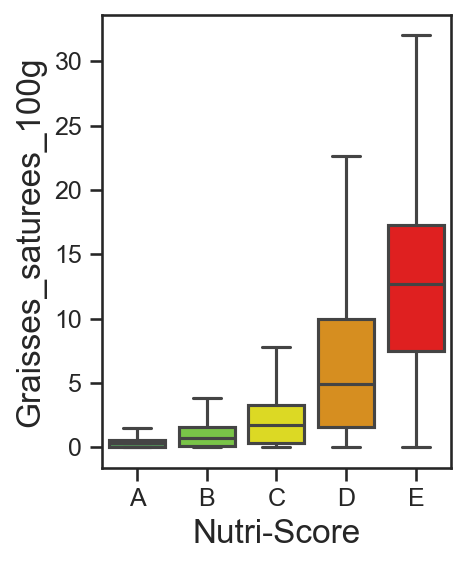

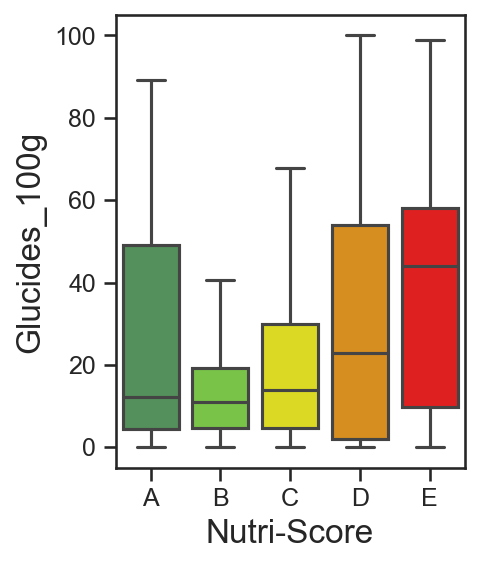

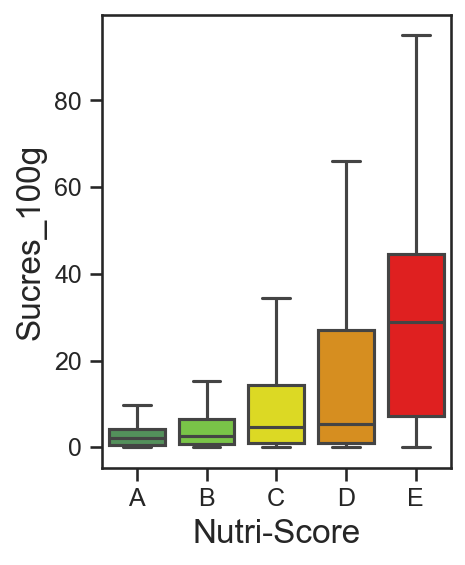

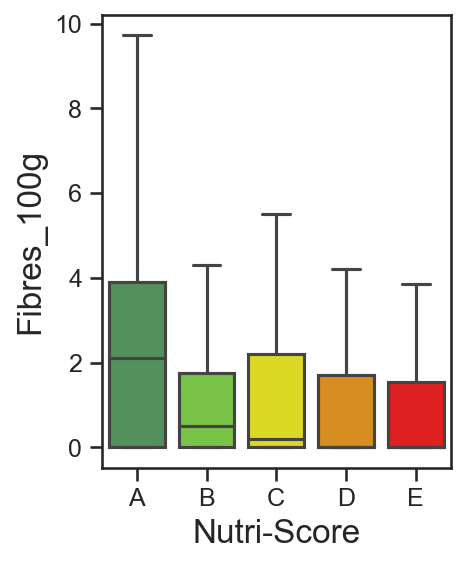

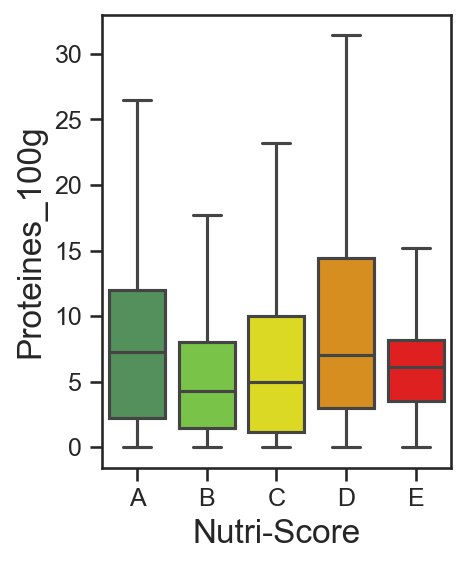

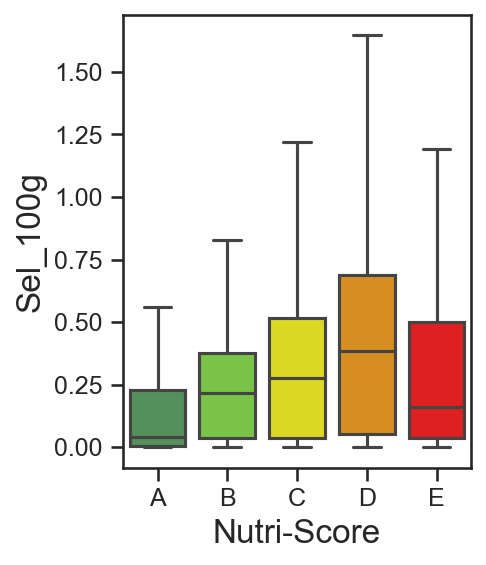

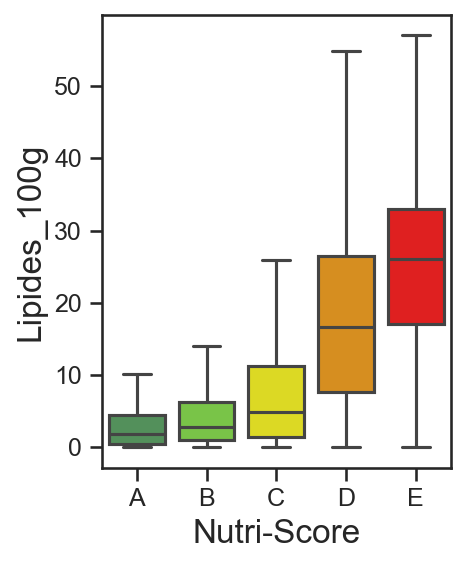

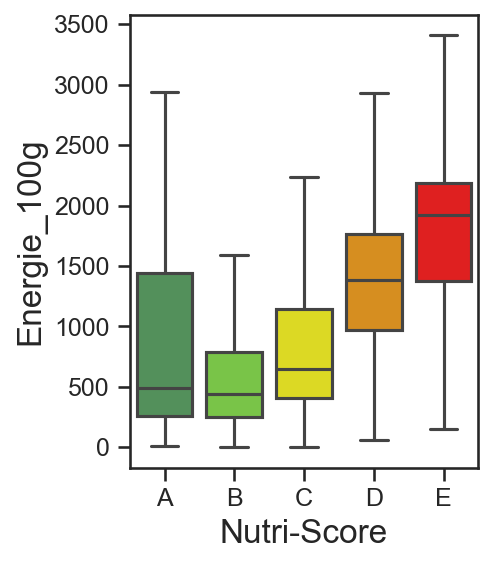

In [39]:
# Création des graphiques en fonction du Nutri-Score pour chaque variable

labels = ['A', 'B', 'C', 'D', 'E']

for nutriment in nutriments :
    fig = plt.figure(figsize =(3,4))
    ax = plt.axes()
    sns.boxplot(data=data, x='nutrition_grade_fr', y=nutriment, order=labels, showfliers=False, palette={'A':"#499A53", 'B':"#74D834", 'C':"#FBF605", 'D':"#F49402", 'E':"#FF0000"})
    #plt.title("Quantité de {nutriment} en fonction du Nurti-Score""\n".format(nutriment=nutriment), fontweight='bold')
    ax = ax.set(xlabel='Nutri-Score',ylabel='{nutriment}'.format(nutriment=nutriment))
    #plt.ylim(0,100)
    
   
    plt.show()

Sur les graphiques, on oberve que pour certaines variables, il y a une grande différence de la quantité du nutriments en fonction du Nutri-score. <br>
Cette différence est-elle statistiquement significative? Avant de faire un test ANOVA, je vais vérifier:
- l'homoscédasticité (variances de chaque groupe sont égales) avec le test de Bartlett
- la normalité avec le test d'Agostino & Pearson

In [40]:
# Test de Bartlett
from scipy.stats import bartlett

for nutriment in nutriments:
    print("Pour", nutriment)
    stat, p = bartlett(data[nutriment].loc[data["nutrition_grade_fr"]=='A'],
            data[nutriment].loc[data["nutrition_grade_fr"]== 'B'],
            data[nutriment].loc[data["nutrition_grade_fr"]== 'C'],
            data[nutriment].loc[data["nutrition_grade_fr"]== 'D'],
            data[nutriment].loc[data["nutrition_grade_fr"]== 'E'])
    if p>0.05:
        print("La condition d'homoscédasticité pour effectuer une ANOVA est validée ")
    else:
        print("La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée")
    print("")

Pour Graisses_saturees_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée

Pour Glucides_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée

Pour Sucres_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée

Pour Fibres_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée

Pour Proteines_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée

Pour Sel_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée

Pour Lipides_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée

Pour Energie_100g
La condition d'homoscédasticité pour effectuer une ANOVA n'est pas validée



In [41]:
# Test d'Agostino & Pearson
from scipy.stats import normaltest

for nutriment in nutriments:
    print("Pour", nutriment)
    k2, p = normaltest(data[nutriment])
    if p>0.05:
        print("La condition de normalité pour effectuer une ANOVA est validée ")
    else:
        print("La condition de normalité pour effectuer une ANOVA n'est pas validée")
    print("")

Pour Graisses_saturees_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour Glucides_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour Sucres_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour Fibres_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour Proteines_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour Sel_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour Lipides_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour Energie_100g
La condition de normalité pour effectuer une ANOVA n'est pas validée



Les conditions pour pouvoir appliquer une ANOVA ne sont donc pas remplis.<br>
Pour avoir tout de même une idée de la corrélation entre la quantité d'un nutriment et le Nutri-Score, je vais calculer le rapport de corrélation.

**Calcul du rapport de corrélation**<br>
<br>
Le rapport de corrélation est aussi appelé eta carré. Il est compris entre 0 et 1:
- Si eta carré =0, les moyennes par classes sont toutes égales et il n'y a donc pas a priori de relation entre les variables
- Si eta carré = 1, les moyennes par classes sont très différentes et il existe à priori une relation entre les variables.

Pour interpréter les résultats, j'utiliserais les balises élaborées par Cohen(1988):
- autour de 0.01: petit effet
- autour de 0.06: effet moyen
- autoure de 0.14 et plus: effet important

In [42]:
X = "nutrition_grade_fr" # qualitative
Y = "Energie_100g" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
for nutriment in nutriments:
    print("Pour", nutriment)
    eta = eta_squared(data[X],data[nutriment])
    if eta < 0.01:
        print("eta-carré =", eta, "-> A priori pas de corrélation entre",nutriment, "et le Nutri-Score")
    if eta > 0.01 and eta < 0.06:
        print("eta-carré =", eta, "-> A priori faible corrélation entre",nutriment, "et le Nutri-Score")
    if eta > 0.06 and eta < 0.14:
        print("eta-carré =", eta, "-> A priori corrélation moyenne entre",nutriment, "et le Nutri-Score")
    if eta > 0.14:
        print("eta-carré =", eta, "-> A priori forte corrélation entre",nutriment, "et le Nutri-Score")
    print("----")

Pour Graisses_saturees_100g
eta-carré = 0.3428752715121924 -> A priori forte corrélation entre Graisses_saturees_100g et le Nutri-Score
----
Pour Glucides_100g
eta-carré = 0.05417297962757508 -> A priori faible corrélation entre Glucides_100g et le Nutri-Score
----
Pour Sucres_100g
eta-carré = 0.21474294209888437 -> A priori forte corrélation entre Sucres_100g et le Nutri-Score
----
Pour Fibres_100g
eta-carré = 0.0434629014951898 -> A priori faible corrélation entre Fibres_100g et le Nutri-Score
----
Pour Proteines_100g
eta-carré = 0.02305174371768854 -> A priori faible corrélation entre Proteines_100g et le Nutri-Score
----
Pour Sel_100g
eta-carré = 0.023846257466869688 -> A priori faible corrélation entre Sel_100g et le Nutri-Score
----
Pour Lipides_100g
eta-carré = 0.2637322565162522 -> A priori forte corrélation entre Lipides_100g et le Nutri-Score
----
Pour Energie_100g
eta-carré = 0.29248808549192334 -> A priori forte corrélation entre Energie_100g et le Nutri-Score
----


En utilisant le rapport de corrélation, il est possible de voir qu'il existe:
- une forte corrélation entre le Nutri-score et les quantités de lipides, graisses saturées, sucres ou l'énergie.
- une faible corrélation entre le Nutri-score et les quantités de glucides, sels, fibres et protéines.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C42">4.2. Existe-il des corrélations entre les variables quantitatives?</a></div>

### <div class="alert alert-block alert-info"><a name="C421">4.2.1. Matrice de corrélation</a></div>

Pour savoir sur les variables quantitatives présentes dans le jeu de données sont corrélées entre elles, il est possible de calculer une matrice de corrélation.


In [43]:
data_correlation = data.copy()
data_correlation = data_correlation.drop(['code', 'created_t','last_modified_t', 'ingredients_that_may_be_from_palm_oil_n'], axis=1 )
data_correlation

,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,...,image_small_url,Graisses_saturees_100g,Glucides_100g,Sucres_100g,Fibres_100g,Proteines_100g,Sel_100g,nutrition-score-fr_100g,Lipides_100g,Energie_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2015-01-25T21:35:01Z,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,NaN,NaN,Sunridge,...,http://fr.openfoodfacts.org/images/products/00...,12.5,70.00,57.5,2.5,2.50,0.038000,22.0,20.000000,1992.500000
1,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,2015-01-01T21:17:31Z,2017-03-09T10:34:12Z,Pack de 2 Twix,NaN,NaN,NaN,NaN,"Twix, Lundberg",...,http://fr.openfoodfacts.org/images/products/00...,0.0,77.08,0.0,6.2,6.25,0.000000,NaN,4.170000,1620.500000
2,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,2017-03-22T17:17:11Z,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN,NaN,NaN,NaN,Alice Délice,...,NaN,2.9,50.30,50.3,3.9,9.50,0.001181,14.0,35.654990,2367.034634
3,http://world-fr.openfoodfacts.org/produit/0000...,andre,2012-08-15T09:48:28Z,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,15 cl,Canette aluminium,canette-aluminium,Pepsi,...,http://fr.openfoodfacts.org/images/products/00...,0.0,10.40,10.4,0.0,0.00,0.010000,13.0,0.000000,176.800000
4,http://world-fr.openfoodfacts.org/produit/0000...,tacite,2015-06-06T10:28:06Z,2015-06-06T11:13:26Z,7Up,Boisson gazeuse aux extraits naturels de citro...,33 cl,Canette,canette,"7Up,Pepsico",...,http://fr.openfoodfacts.org/images/products/00...,0.0,10.40,10.4,0.0,0.00,0.039370,13.0,0.000000,176.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51504,http://world-fr.openfoodfacts.org/produit/9606...,kiliweb,2017-02-28T12:51:05Z,2017-02-28T12:51:05Z,Princes Tuna Chunks In Brine 160G,NaN,NaN,NaN,NaN,Princes,...,NaN,0.1,0.00,0.0,0.1,23.50,0.413386,0.0,1.445375,453.778864
51505,http://world-fr.openfoodfacts.org/produit/9608...,kiliweb,2017-04-01T11:06:08Z,2017-04-01T11:06:08Z,Coffee & Chocolate With Peanuts 12 x 45G,NaN,NaN,NaN,NaN,Eat Natural,...,NaN,6.1,17.90,17.9,6.0,19.00,0.118110,11.0,30.760542,1813.440059
51506,http://world-fr.openfoodfacts.org/produit/9608...,kiliweb,2017-04-18T15:04:14Z,2017-04-18T15:04:14Z,Peanut & Popcorn With Dark Chocolate 12 x 45G,NaN,NaN,NaN,NaN,Great value,...,NaN,7.8,34.10,34.1,5.4,10.90,0.157480,15.0,26.673249,1795.110203
51507,http://world-fr.openfoodfacts.org/produit/9610...,openfoodfacts-contributors,2016-12-07T13:51:46Z,2017-02-17T17:10:08Z,Eat Natural Protein Packed,NaN,NaN,NaN,NaN,Biobio,...,NaN,10.0,22.00,22.0,6.0,22.00,0.393701,17.0,28.613854,1854.712614


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'additives_n'),
  Text(1.5, 0, 'ingredients_from_palm_oil_n'),
  Text(2.5, 0, 'Graisses_saturees_100g'),
  Text(3.5, 0, 'Glucides_100g'),
  Text(4.5, 0, 'Sucres_100g'),
  Text(5.5, 0, 'Fibres_100g'),
  Text(6.5, 0, 'Proteines_100g'),
  Text(7.5, 0, 'Sel_100g'),
  Text(8.5, 0, 'nutrition-score-fr_100g'),
  Text(9.5, 0, 'Lipides_100g'),
  Text(10.5, 0, 'Energie_100g')])

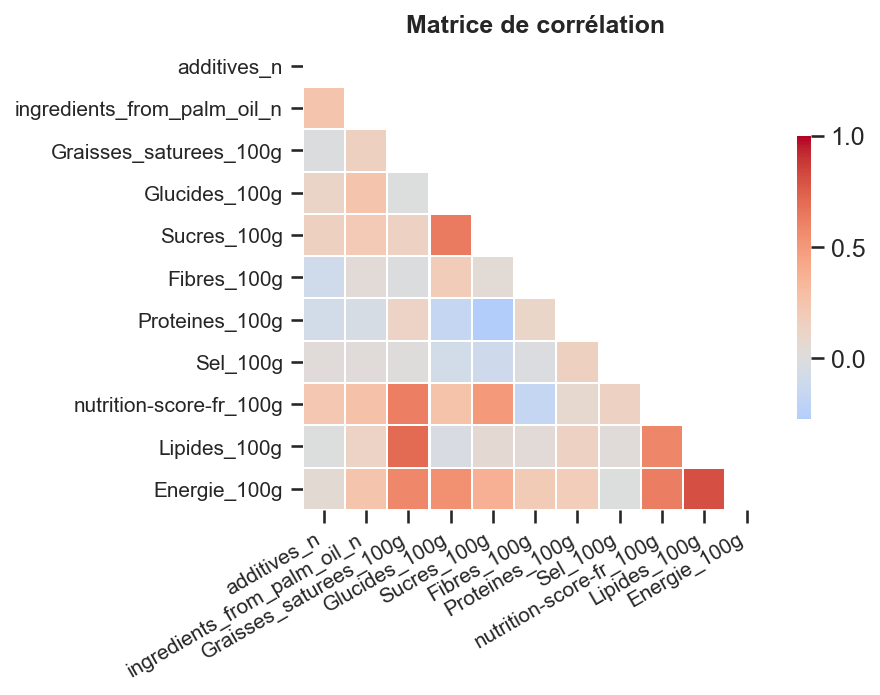

In [44]:
corr_mat = data_correlation.corr()
corr_mat

# Pour avoir une forme triangulaire
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(corr_mat, mask=mask, vmax=1, center=0,square=True, linewidths=0.5, cmap="coolwarm",cbar_kws={"shrink":.5})
plt.title("Matrice de corrélation", fontweight='bold', fontsize=12)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
plt.xticks(rotation=30,ha='right')

Sur cette matrice de corrélation, il apparait que les variables 'saturated-fat_100g', 'ii-fat_100g', 'nutrition-score-fr_100g' et 'estimated_energy_100g' sont corrélées entre elles.<br>
Ces variables forment-elles un groupe qu'il est possible de réunir?
Pour répondre à cette question, une analyse en composantes principales est réalisée.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C412">4.1.2. Analyse en composantes principales</a></div>


In [45]:
from sklearn import decomposition, preprocessing
from functions import *

In [46]:
# Choix du nombre de composantes à calculer
n_comp = 8

data_acp = data.copy()

# Sélection des données à prendre en compte dans l'ACP
data_acp = data_acp.loc[:,"Graisses_saturees_100g":"Energie_100g"]
data_acp = data_acp.drop('nutrition-score-fr_100g', axis =1)
data_acp

,Graisses_saturees_100g,Glucides_100g,Sucres_100g,Fibres_100g,Proteines_100g,Sel_100g,Lipides_100g,Energie_100g
0,12.5,70.00,57.5,2.5,2.50,0.038000,20.000000,1992.500000
1,0.0,77.08,0.0,6.2,6.25,0.000000,4.170000,1620.500000
2,2.9,50.30,50.3,3.9,9.50,0.001181,35.654990,2367.034634
3,0.0,10.40,10.4,0.0,0.00,0.010000,0.000000,176.800000
4,0.0,10.40,10.4,0.0,0.00,0.039370,0.000000,176.800000
...,...,...,...,...,...,...,...,...
51504,0.1,0.00,0.0,0.1,23.50,0.413386,1.445375,453.778864
51505,6.1,17.90,17.9,6.0,19.00,0.118110,30.760542,1813.440059
51506,7.8,34.10,34.1,5.4,10.90,0.157480,26.673249,1795.110203
51507,10.0,22.00,22.0,6.0,22.00,0.393701,28.613854,1854.712614


In [47]:
# Ce jeu de données contient-il des valeurs manquantes?
data_acp.isnull().sum()

Graisses_saturees_100g    0
Glucides_100g             0
Sucres_100g               0
Fibres_100g               0
Proteines_100g            0
Sel_100g                  0
Lipides_100g              0
Energie_100g              0
dtype: int64

In [48]:
X = data_acp.values
names = data_acp.index
features = data_acp.columns
theme = data["nutrition_grade_fr"].to_list()

In [49]:
# Centrage et réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [50]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=8)

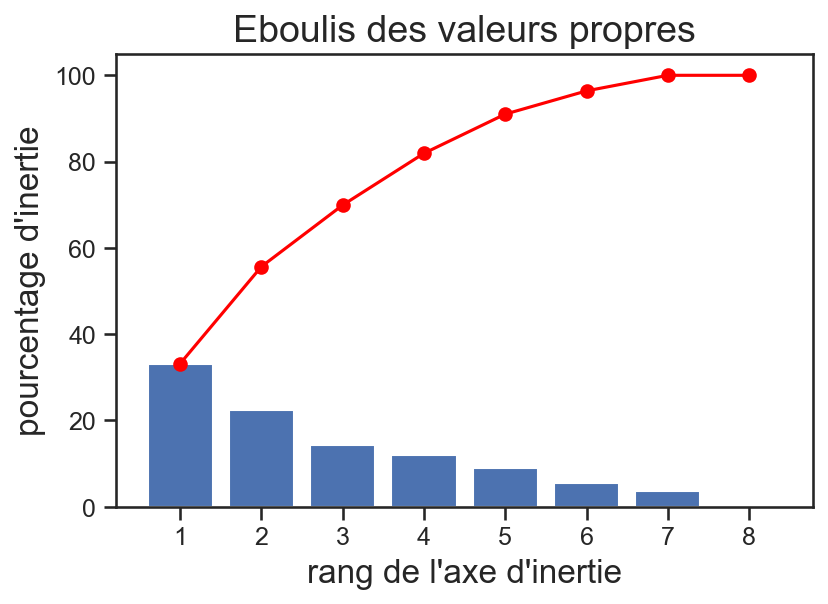

In [51]:
# Eboulis des valeurs propres
display_scree_plot(pca)

Au vue du graphique de l'éboulis des valeurs propres, je ne vais conserver pour la suite de l'analyse que les 2 premiers axes d'inertie. Le premier axe d'inertie conserve 33.2% de l'inertie totale tandis que le second axe en conserve 22.5 %. Ces deux axes représentent donc 55,7% de l'inertie totale.

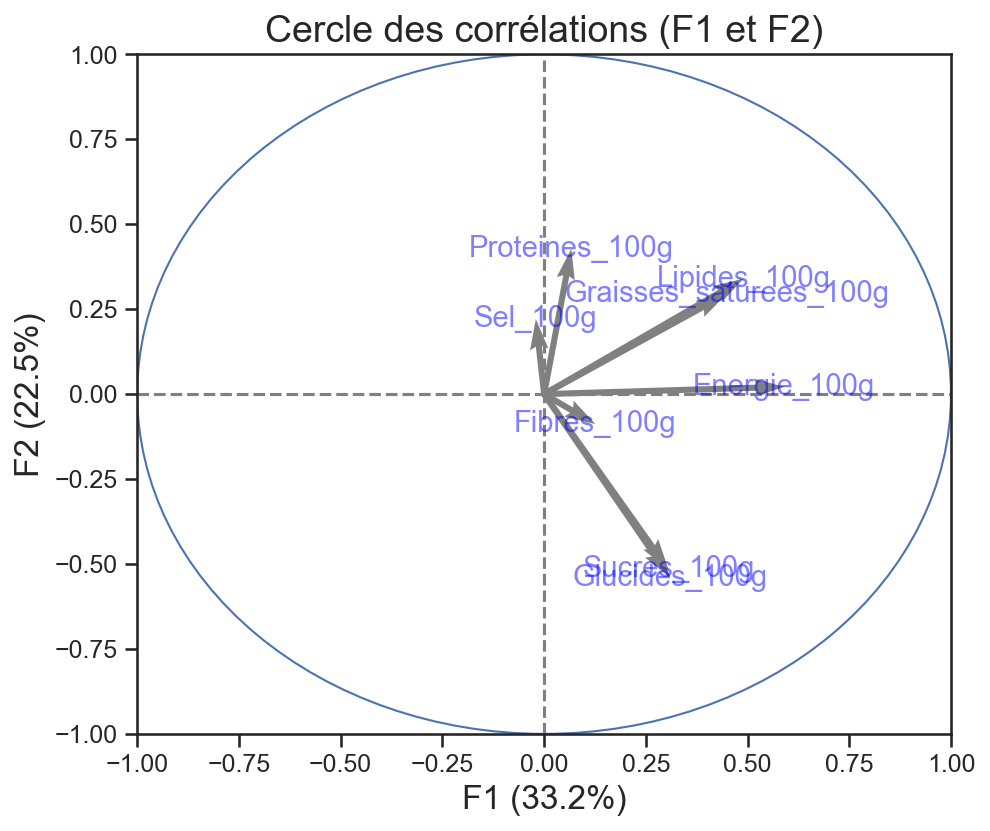

In [52]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels=np.array(features))

Le cercle des corrélations permet de voir que:
   - les variables les plus corrélées à F1 sont 'estimated_energy_100g', 'saturated-fat-100g' et 'ii-fat_100g'. Ceci semble logique puisque ce sont les matières grasses qui apportent le plus d'energie
   - les variables les plus corrélées à F2 sont 'sugars_100g' et 'carbohydrates_100g' de manières négatives et 'proteins_100g' de manière positives.
    
Ce qui différencie le plus les produits de notre échantillon est l'energie et la proportion de lipides ensuite vient la quantité de glucides et celles de protéines.

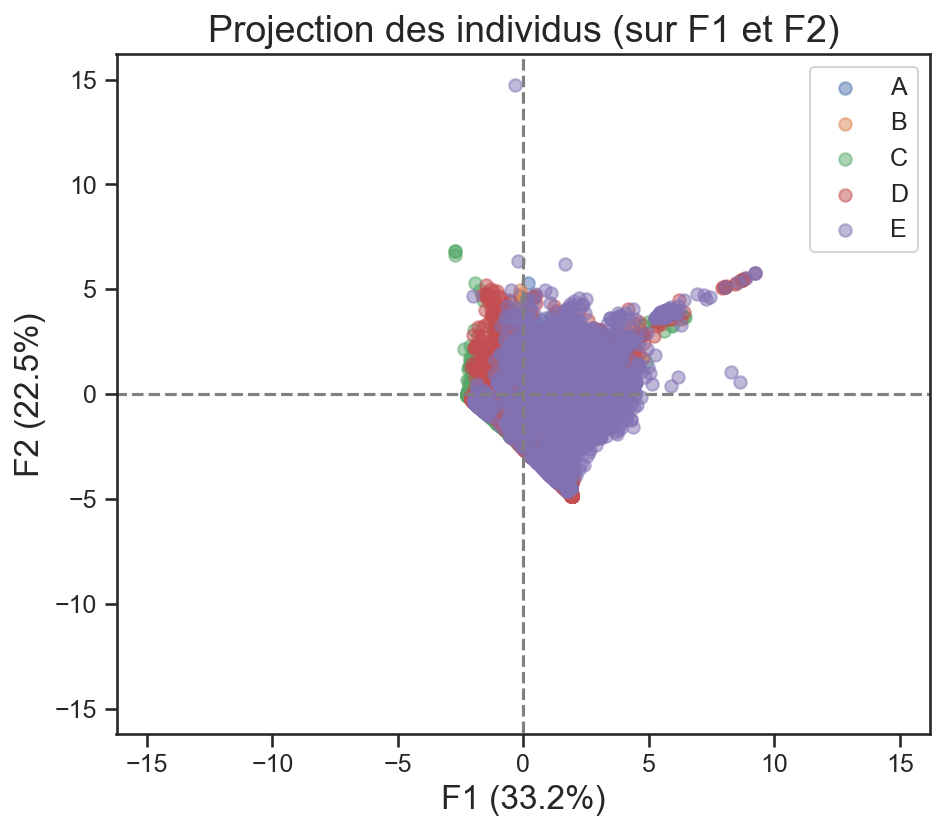

In [53]:
# Projections des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = theme, alpha = 0.5)

Lorsqu'ils sont projetés sur les deux premiers factoriels, les différents produits du jeu de données sont très regroupés. Il n'est pas possible d'identifier des catégories distincts de produits.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C43">4.3. Existe-t-il des catégories de produits avec de meilleurs Nutri-scores</a></div>

Ici, je souhaite analyser deux variables quantitatives


In [54]:
# Variables pour le tableau de contingence
X = "pnns_groups_1"
Y = "nutrition_grade_fr"

c = data[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len,margins=True,margins_name="Total")
cont = c.copy()


cont

nutrition_grade_fr,A,B,C,D,E,Total
pnns_groups_1,,,,,,
Beverages,121,357,1191,670,1668,4007
Cereals and potatoes,2675,812,1015,604,65,5171
Composite foods,1274,1604,1413,804,70,5165
Fat and sauces,101,203,699,1214,528,2745
Fish Meat Eggs,652,585,1304,1339,897,4777
Fruits and vegetables,2228,560,296,40,2,3126
Milk and dairy products,547,939,1290,2241,214,5231
Salty snacks,66,65,462,883,298,1774
Sugary snacks,89,213,651,2833,3772,7558


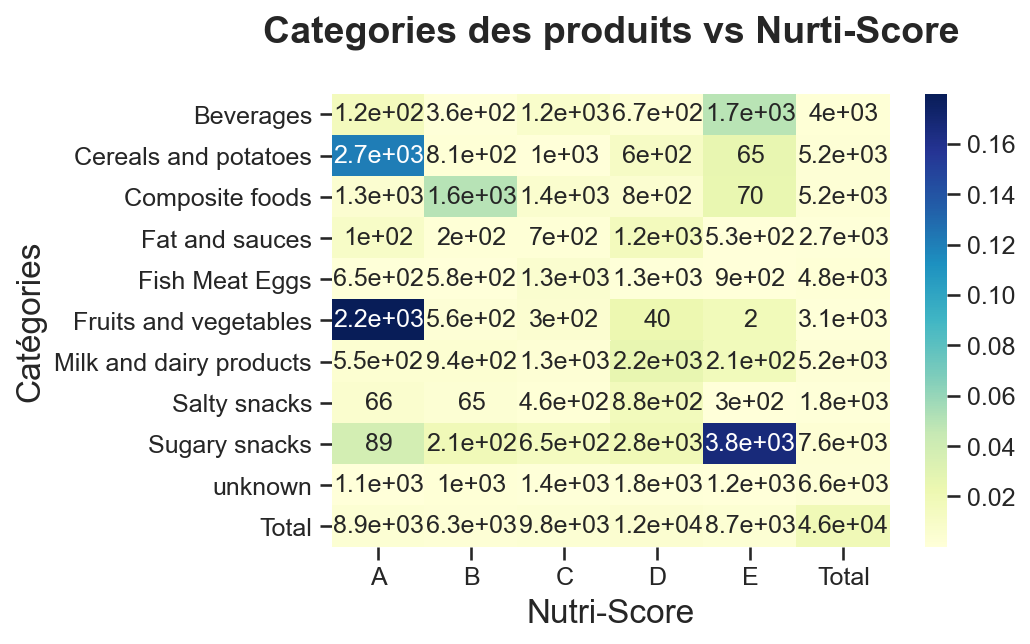

In [55]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0

measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n



fig = plt.figure()
ax = plt.axes()
sns.heatmap(measure/xi_n, annot=c,cmap="YlGnBu")
plt.title("Categories des produits vs Nurti-Score""\n", fontweight='bold')
ax = ax.set(xlabel='Nutri-Score',ylabel='Catégories',)



plt.show()

La heat-map nous apprend que les fruits et légumes ont le plus souvent un Nutri-Score A alors que les sugary_snacks ont le plus souvent un Nutri-Score E.

In [56]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(c)
st_p

0.0